[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AetherrAkuma/Real-ESRGAN-Colab/blob/master/Real_ESRGAN_Colab.ipynb)
# **Upscale Using Real ESRGAN**
---
Colab Version: v1.0

Created by Aetherr Akuma

*Heavily Inspired by Official Colab Version of Real-ESRGAN* [click here to redirect](https://colab.research.google.com/drive/1k2Zod6kSHEvraybHl50Lys0LerhyTMCo?usp=sharing
) 




### Follow all the Steps Needed
 1.  Run the Pre exquisite Files in order to this to work. **its in the bottom of this text**
 2. Next Go to the Upload Section where you will place your Low af quality image/picture. Make sure to follow all instructions there. We Currently have 3 options: 
  - Local Upload
  - Google Drive
  - Gallery-dl
 3. When Done, Your Next Step is the Settings where you will select some really interesting things to do on your images. **Make Sure you Run that First as they contains important commands**  
 4. If All are Ready, Then Run the Real-ESRGAN Code Block Below it and Wait Patiently. The Speed Depends on how many image contains.
 5. Now that Upscaling is done, You have 2 options
  1. Show the original image & the upscaled image
  2. Download/Move your Image to your Drive Storage
  3. Upload your image to third party cdn or cloud e.g fileditch
 6. If you want to Upload Videos Just Scroll Down until you see the Video Section

# Pre-Exquisite Downloads

Download and Setup for Real-ESRGAN to work as well as its required files and modules


It can take for about 5-10 mins

In [1]:
#@title Pre-Exquisite Downloads  { display-mode: "form" }
# Run this First before Proceeding to other code blocks

import os, shutil, subprocess, cv2, glob, torch, time, json
from google.colab import files, drive, runtime
import matplotlib.pyplot as plt
from IPython.display import HTML, clear_output, display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets, Output, GridspecLayout, Layout, Button, VBox, Label,Box
from base64 import b64encode
start_time = time.perf_counter()
class RuntimeSelection(Exception):
  pass

class Setting_Error(Exception):
  pass

class ViewerSettingError(Exception):
  pass

class GoogleDriveError(Exception):
  pass

if torch.cuda.is_available() == False:
  raise RuntimeSelection("There is no GPU on the Current Runtime.\n Please Change the Runtime Type in Runtime -> Change Runtime Type -> GPU -> Save")
else:
  print("GPU Runtime Available.\nSetting Up Please Wait....")

!git clone https://github.com/xinntao/Real-ESRGAN.git
# !wget https://nekofile.eu.org/ce4bb7e12cff137370e12qf0t
# !mv ce4bb7e12cff137370e12qf0t config.conf
# !pip install -U gallery-dl
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr 
!pip install facexlib 
!pip install gfpgan 
!pip install -r requirements.txt 
!pip install ffmpeg-python
!pip install ipywidgets 
!python setup.py develop
!jupyter nbextension enable --py widgetsnbextension
end_time = time.perf_counter()
clear_output()
tiime = end_time - start_time

print(f"Download & Setup Done!\n Time Run: {tiime}")

Download & Setup Done!
 Time Run: 35.69270616100002


# Upload (Image)

#### Upload your image based on your selected mode:
 - Direct Upload
 - Google Drive
 - Gallery-dl (Not Available "Yet")
---
#### Direct Upload
You can Upload your Image directly to the runtime storage but it can also be much slower compare to other modes

---
#### Google Drive
 Transfer your Image inside your Goggle Drive Folder and Put it inside the Runtime. Faster compare to Local Upload. ***Required to Authorize your Google Drive Access here, Just follow the pop up google shows***

---
#### Gallery-DL
For those who want to Download the Image like pixiv then directly put it here

*NOTE: This is for Experienced User and can make your brain fried if you didn't know extractors*

NOT AVAILABLE YET

---







In [2]:
#@title Upload (Image)  { display-mode: "form" }
gdrive_setup=False
def up_input(x):
  global upload_dir
  upload_dir = x
def out_input(y):
  global output_dir
  output_dir = y


def do_it(btn):
  authorize = widgets.Button(
      value="",
      description='Authorize',
      disabled=False,
      button_style='success', # 'success', 'info', 'warning', 'danger' or ''
      icon='check', # (FontAwesome names without the `fa-` prefix)
  )
  # To Clear Past Operations
  upload_folder = "upload"
  result_folder = "results"

  if os.path.isdir(upload_folder):
      shutil.rmtree(upload_folder)
  if os.path.isdir(result_folder):
      shutil.rmtree(result_folder)
  if os.path.exists("/content/Real-ESRGAN/results/link.txt"):
    os.remove("/content/Real-ESRGAN/results/link.txt")
  if os.path.exists("/content/Real-ESRGAN/results/listoflinks.txt"):
    os.remove("/content/Real-ESRGAN/results/listoflinks.txt")
  if os.path.exists("/content/Real-ESRGAN/results/inquire.json"):
    os.remove("/content/Real-ESRGAN/results/inquire.json")
  os.mkdir(upload_folder)
  os.mkdir(result_folder)
  # -------------------------- #

  clear_output()
  if mode.value == "Direct Upload":
    print("Upload/Drag & Drop your Image here")
    uploaded = files.upload()
    for filename in uploaded.keys():
      dst_path = os.path.join(upload_folder, filename)
      print(f'move {filename} to {dst_path}')
      shutil.move(filename, dst_path)
    clear_output()
    print("Upload Completed!")

  if mode.value == "Google Drive":
    print("Type your Directory of the Folder inside your Google Drive\nTo Add SubFolder Just Put / next to the name of the parent folder\nDon't Remove the Forward Slash.")
    
    # Buttons #
    interact(up_input, x=widgets.Text(
    value='/',
    placeholder='Folder to Fetch your Images',
    description='Upload Directory: ',
    disabled=False
  ));

    interact(out_input, y=widgets.Text(
    value='/',
    placeholder='Folder to Get the Upscaled Images',
    description='Output Directory: ',
    disabled=False
  ));
    # ------------------------------ #

    display(authorize)
    authorize.on_click(gdrive_process)
  
  


def gdrive_process(auth_btn):
  global gdrive_setup
  clear_output()
  drive.mount('/content/drive')
  print("Successfully Authorized. Now Transferring...")
  if os.path.exists("/content/drive/MyDrive/" + upload_dir):
    for i in os.listdir(f"/content/drive/MyDrive/{upload_dir}"):
        shutil.copy(f"/content/drive/MyDrive/{upload_dir}/{i}", f"/content/Real-ESRGAN/upload/{i}")
        print(f'Copied {i} to /content/Real-ESRGAN/upload/')
    else:
      print("Successfully Copied All Images")
  else:
    raise GoogleDriveError(f"Google Drive Folder \"{upload_dir}\" does not Exist on your Drive.\nPlease Specify the Existing Folder in your Drive.")
  
  clear_output()
  gdrive_setup = True
  print("Upload Process Complete! Please Proceed to the Next Step")


upload_dir = output_dir = modee = ""
print("Choose What Mode of Upload to Execute")
mode = widgets.Dropdown(
    options=[('Direct Upload'), ('Google Drive')],
    value="Direct Upload",
    description='Method Upload:',
)
next_1 = widgets.Button(
    value="conf",
    description='Confirm',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip=mode.value,
    icon='check' # (FontAwesome names without the `fa-` prefix)
)


display(mode, next_1)
next_1.on_click(do_it)

Upload Completed!


# Settings (Image)
Before Starting Choose what you what to do and need to do to your Uploaded Image

 1. Model:
    - Anime (RealESRGAN_x4plus_anime_6B):
      - For Anime images like artworks and likely be much slower compare
    - Anime Video (realesr-animevideov3):
      - Same for Anime but this is artifact prone and only useful for videos
  
    - General v3 (realesr-general-x4v3):
      - for General use like real life images (can use denoise)
      - also New General model for 2022
    - General plus (RealESRGAN_x4plus):
       - Like general v3 but no denoise
 2. Outscale:
  - The final upsampling scale of the image
 3. Denoise:
  - Remove Noise from the image
 4. Tile:
  - Tile size, 0 for no tile during testing
 5. fp32:
  - Use fp32 precision during inference. Default: fp16 (half precision)
 6. Ext:
  - Extension of the image by the end of the upscaling (can be changed if different from the source)
  - Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto
 7. Suffix:
  - Suffix of the restored image. Default: outx
 8. face_enhance:
  - Whether to use GFPGAN to enhance face.

In [3]:
#@title Settings (Image)  { display-mode: "form" }
setting_done = False
class outscale_settings():
  def value(x):
    global outscale
    outscale = x
    print(f"Your Image will be Upscaled {outscale}x")
    outscale = f"--outscale {outscale}"

  def select(x):
    clear_output()
    print("Choose how many scale you want to do to your image.\n Higher = High Quality & Size Recommended: 2 or 4")
    interact(outscale_settings.value, x=widgets.IntText(
      value=4,
      description='Outscale:',
      disabled=False
  ));

    btn_outscale = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='success',
      tooltip='Proceed to the next Section',
  )
    display(btn_outscale)
    btn_outscale.on_click(tile_settings.select)

class tile_settings():
  def value_update(y):
    global tile
    tile = y
    print(f"{tile} Tile size")
    tile = f"--tile {tile}"
    
  def select(o):
    clear_output()
    print("Choose How Large is Tile Size. Commonly Used for Large Size Image to avoid running out of cuda memory\n Recommended: 200 or 400")
    interact(tile_settings.value_update, y=widgets.IntSlider(
      value=200,
      min=0,
      max=2000,
      step=1,
      description='Tile:',
      orientation='horizontal',
      readout=True,
      readout_format='d'
  ));
    btn_tile = widgets.Button(
      value=".",
      description='Select',
      disabled=False,
      button_style='info',
      tooltip='Proceed to the next Section',
  )
    display(btn_tile)
    btn_tile.on_click(fp_settings.select)

class fp_settings():
  def update_value(x):
    global fp
    fp = x
    if fp == "fp32":
      fp = "--fp32"
    elif fp == "fp16 (default)":
      fp = ""

  def select(x):
    clear_output()
    print("Choose what to Do\n fp16 (half precision but faster)\n fp32 - fp32 precision during inference")
    interact(fp_settings.update_value, x=widgets.RadioButtons(
    options=['fp16 (default)', 'fp32'],
    description='fp settings:',
    disabled=False
));
    btn_fp = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip='Proceed to the next Section',
)
    display(btn_fp)
    btn_fp.on_click(denoise_settings.select)

class denoise_settings():
  def update(x):
    global denoise
    denoise = x
    if denoise == "No Denoise":
      denoise = ""
    elif denoise == "Weak Denoise":
      denoise = "-dn 0"
    elif denoise == "Strong Denoise":
      denoise = "-dn 1"
    else:
      pass

  def select(x):
    clear_output()
    btn_denoise = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info',
      tooltip='Proceed to the next Section',
  )
    if model_select.value == "realesr-general-x4v3":
      print("Denoising the Image based on your Selection:\n No Denoise - Self Explanatory\n Weak Denoise - Keeping Noise in Minimal Effect \n Strong Denoise - Removing Any Noise that will be Detected")
      interact(denoise_settings.update, x=widgets.RadioButtons(
      value='No Denoise',
      options=['No Denoise', 'Weak Denoise', 'Strong Denoise'],
      description='Denoising:',
      disabled=False
  ));
      display(btn_denoise)
      btn_denoise.on_click(faceenhance_settings.select)
    else:
      print("Skipping Denoising.\n Reason: Anime aren't Supported by denoiser")
      global denoise
      denoise = ""
      btn_denoise.description = "Proceed"
      display(btn_denoise)
      btn_denoise.on_click(faceenhance_settings.select)

class faceenhance_settings():
  def update(x):
    global faceenhance
    if x == 'No Face Enhance':
      faceenhance = ""
    elif x == "Use Face Enhance":
      faceenhance = "--face_enhance"
    else:
      pass

  def select(x):
    clear_output()
    btn_face = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip='Proceed to the next Section',
)
    if model_select.value == "realesr-general-x4v3" or model_select.value == "RealESRGAN_x4plus":
      print("Enhancing Blurry, Not Clear, Old Real Face to Clear Faces\nOnly for Real Faces will work here.")
      interact(faceenhance_settings.update, x=widgets.RadioButtons(
      value='No Face Enhance',
      options=['No Face Enhance', 'Use Face Enhance'],
      description='Face Enhance:',
      disabled=False
  ));
      
      display(btn_face)
      btn_face.on_click(extension_suffix_settings.select) # Yeah i know its long 
    else:
      global faceenhance
      print("Skipping Face Enhance.\n Reason: Only Real Face will work")
      faceenhance = ""
      btn_face.description = "Proceed"
      display(btn_face)
      btn_face.on_click(extension_suffix_settings.select)

class extension_suffix_settings():
  def update_ext(x):
    global ext
    ext = f"--ext {x}"

  def update_suffix(x):
    global suffix
    suffix = f"--suffix {x}"

  def select(x):
    clear_output()
    print("Will Change the Extension if the Original Image is Different Compare to The Choice here")
    interact(extension_suffix_settings.update_ext, x=widgets.Dropdown(
    options=['png', 'jpg', 'auto'],
    value='png',
    description='extension:',
    disabled=False,
));
    print("Any word that will be Placed on the end of the filename")
    interact(extension_suffix_settings.update_suffix, x=widgets.Text(
    value='outx',
    placeholder='Anything that ends in the name of the image',
    description='Suffix:',
    disabled=False
));  
    btn_extsuff = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='Success',
    tooltip='Proceed to the next Section',
)
    display(btn_extsuff)
    btn_extsuff.on_click(recollect)

def recollect(x):
  global setting, model, setting_done
  model = f"-n {model_select.value}"
  setting = f"{model} -i upload {outscale} {tile} {fp} {ext} {suffix} {denoise} {faceenhance}"
  clear_output()
  setting_done = True
  print("Setting has been Set and Ready to Apply in Real-ESRGAN")


model_select = widgets.Dropdown(
    options=[('General Model v3', 'realesr-general-x4v3'), ('General Model plus', 'RealESRGAN_x4plus'), ('Anime Model', 'RealESRGAN_x4plus_anime_6B'), ('Anime Video Model', 'realesr-animevideov3')],
    value='RealESRGAN_x4plus_anime_6B',
    description='Model Selection:',
    disabled=False
)
btn_model = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip='Proceed to the next Section',
)

display(model_select, btn_model)
btn_model.on_click(outscale_settings.select)

Setting has been Set and Ready to Apply in Real-ESRGAN


# Inference/Upscale (Image)

Now Run this to upscale your Image and Wait Patiently

Note: You must run the Settings first before proceeding here

Loading your Image Please Wait...


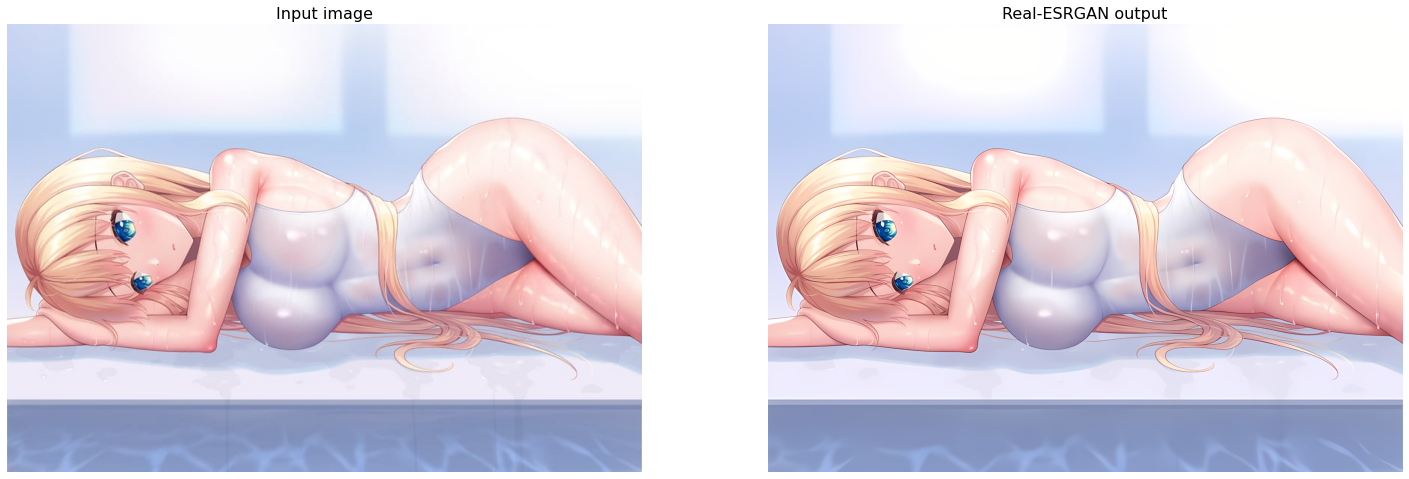

In [4]:
#@title Upscale (Image)  { display-mode: "form" }
class Setting_Error(Exception):
  pass

if setting_done == False:
  raise Setting_Error('You Didn\'t Configure your Settings.\n Please Configure your Settings first before proceeding here')
else:
  pass

def show_images(x):
  clear_output()
  print("Loading your Image Please Wait...")
  # display each image in the upload folder
  input_folder = 'upload'
  result_folder = 'results'
  input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
  output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
  for input_path, output_path in zip(input_list, output_list):
    img_input = imread(input_path)
    img_output = imread(output_path)
    displayy(img_input, img_output)

def displayy(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

btn_show = widgets.Button(
    value=".",
    description='Show Image/s',
    disabled=False,
    button_style='success',
    tooltip='Proceed to the next Section',
)

!python inference_realesrgan.py {setting}
clear_output()
print("Upscaling Done\n Want to show all Image?")
display(btn_show)
btn_show.on_click(show_images)

# Download/Send to Third party Cloud (Image)

We have 3 Options:

1. Direct Download
2. Google Drive
3. Third party Clouds

---

#### Direct Download:
You can Directly Download all your image into a zip but this is slow compare to others

---

#### Google Drive:
Transfering/Moving your upscaled image to your designated output directory you've input on upload. If the directory does not exist it will create new folder named after your input

---

#### Third party clouds:
We have 3  permanent providers for now:
1. loli.solutions
  - below 100 MB only
  - If you see on the website, it shows 2gb but you have been pranked by loli.solution because if you upload higher than 100MB you will see an error of file is large
2. fileditch.com
  - 15 GB limit
  - Default
3. nekofile.eu.org
  - 10 GB limit
  - Might be slow to load but great for sfw files
  - NSFW is allowed but real porn is big no no for it
---

In [5]:
#@title Download (Image)  { display-mode: "form" }
def download_now(x):
  clear_output()
  print("Please WAIT...")
  zip_filename = f'{zipname}.zip'
  if os.path.exists(zip_filename):
    os.remove(zip_filename)
  os.system(f"zip -r -j {zip_filename} results/*")
  files.download(zip_filename)
  print("Your Zip is now Ready & will be downloaded in a minute. Enjoy your Image Result :>")

def gdrive_process_after(auth_btn):
  clear_output()
  drive.mount('/content/drive')
  print("Successfully Authorized.")

def gdrive_download():
  if gdrive_setup == False:
    interact(out_input, y=widgets.Text(
    value='/',
    placeholder='Folder to Transfer the Upscaled Images',
    description='Output Directory: ',
    disabled=False
  ));
    authorize_after = widgets.Button(
      value="",
      description='Authorize',
      disabled=False,
      button_style='success', # 'success', 'info', 'warning', 'danger' or ''
      icon='check', # (FontAwesome names without the `fa-` prefix)
  )
    # ------------------------------ #

    display(authorize_after)
    authorize_after.on_click(gdrive_process_after)
  
  clear_output()
  if os.path.exists(f"/content/drive/MyDrive/{output_dir}") == False:
      os.system(f"mkdir /content/drive/MyDrive/{output_dir}")
  else:
    pass
  for i in os.listdir("/content/Real-ESRGAN/results/"):
    try:
      if i != "listoflinks.txt" or i != "inquire.json" or i != "link.txt":
        shutil.move(f'/content/Real-ESRGAN/results/{i}', f'/content/drive/MyDrive/{output_dir}/{i}')
        print(f"The File {i} has been Transfered to your Google Drive")
      else:
        pass
    except IsADirectoryError:
      pass
  clear_output()
  print("Transfer Done!\n Enjoy your Image Result :>")

class thirdpartycloud():  
  def gate(x):
    if tp_cloud == "loli.solutions":
      print("Pass your Token here. To Get the token register on loli.solutions then login\n Once you're done head over to the 'Change Token' then copy your token and paste it here")
      interact(thirdpartycloud.lolisafe_token_update, c=widgets.Text(
        value='',
        placeholder='Your Token here',
        description='Token: ',
        disabled=False
  ));
      btn_lolisol = widgets.Button(
      value=".",
      description='Enter',
      disabled=False,
      button_style='info',
      tooltip="Download Button to start",
  )
      display(btn_lolisol)
      btn_lolisol.on_click(thirdpartycloud.lolisafe)
    elif tp_cloud == "fileditch.com":
      thirdpartycloud.fileditch()
    elif tp_cloud == "nekofile.eu.org":
      thirdpartycloud.nekofile()
  

  def lolisafe_token_update(c):
    global token
    token = c
  
  def lolisafe(x):
    clear_output()
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      !curl -H "token: {token}" -F "files[]=@/content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/inquire.json https://loli.solutions/api/upload
      with open("/content/Real-ESRGAN/results/inquire.json", "r") as report:
        FileContent = json.load(report)
      with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as txt:
        txt.writelines(FileContent["files"][0]["url"])
    else:
      clear_output()
      files.download("/content/Real-ESRGAN/results/listoflinks.txt")
    print("Process Done!\n Your Image Links are in the 'listoflinks.txt' that has been downloaded for you!")

  def fileditch():
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      !curl -F "files[]=@/content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/inquire.json https://up1.fileditch.com/upload.php
      with open("/content/Real-ESRGAN/results/inquire.json", "r") as parsed:
        FileContent = json.load(parsed)
      with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as txt:
        txt.writelines(FileContent["files"][0]["url"])
    else:
      clear_output()
      files.download("/content/Real-ESRGAN/results/listoflinks.txt")
    print("Process Done!\n Your Image Links are in the 'listoflinks.txt' that has been downloaded for you!")

  def nekofile():
    links = []
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      if i != "link.txt":
        !curl -F "file=@//content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/link.txt https://nekofile.eu.org/
      else:
        pass
      with open("/content/Real-ESRGAN/results/link.txt", "r") as lnk:
        links.append(lnk.read())
    else:
      for z in links:
        with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as llk:
          llk.writelines(z)
      else:
        clear_output()
        files.download("/content/Real-ESRGAN/results/listoflinks.txt")
    print("Process Done!\n Your Image Links has been Listed and Will be Downloaded for you!")


def tpcloud_update(x):
  global tp_cloud
  tp_cloud = x
  
def dl_update(y):
  global zipname, btn_dl
  zipname = y

def choice_gate(x):
  clear_output()
  if download_mode == "Direct Download":
    interact(dl_update, y=widgets.Text(
    value='',
    placeholder='Name of your Zip file',
    description='Zip name: ',
    disabled=False
  ));
    btn_dl = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info',
      tooltip="Download Button to start",
  )
    display(btn_dl)
    btn_dl.on_click(download_now)
  elif download_mode == "Google Drive":
    gdrive_download()
  elif download_mode == "Third Party Clouds":
    interact(tpcloud_update, x=widgets.Dropdown(
    options=['loli.solutions', 'fileditch.com', 'nekofile.eu.org'],
    value='fileditch.com',
    description='Providers: ',
    disabled=False,
  ));
    btn_tpcloud = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info',
      tooltip="Download Button to start",
  )
    display(btn_tpcloud)
    btn_tpcloud.on_click(thirdpartycloud.gate)

def dl_choice(x):
  global download_mode
  download_mode = x



#-----------  Main -------------- #
if os.path.exists("/content/Real-ESRGAN/results/listoflinks.txt"):
  os.remove("/content/Real-ESRGAN/results/listoflinks.txt")
if os.path.exists("/content/Real-ESRGAN/results/link.txt"):
  os.remove("/content/Real-ESRGAN/results/link.txt")
if os.path.exists("/content/Real-ESRGAN/results/inquire.json"):
  os.remove("/content/Real-ESRGAN/results/inquire.json")

interact(dl_choice, x=widgets.Dropdown(
    options=['Direct Download', 'Google Drive', 'Third Party Clouds'],
    value='Direct Download',
    description='download mode:',
    disabled=False,
));
btn_conf = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip='Proceed to the next Section',
)

display(btn_conf)
btn_conf.on_click(choice_gate)

Please WAIT...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your Zip is now Ready & will be downloaded in a minute. Enjoy your Image Result :>


# **VIDEO Upscaling**
---
##### Here you can upscale your video in any quantity as long as it is small and not large (e.g >1gb)

### Follow all the Steps Needed
 1.  Run the Pre exquisite Files in order to this to work. **its in the bottom of this text**
 2. Next Go to the Upload Section where you will place your Low af quality video/s. Make sure to follow all instructions there. We Currently have 3 options: 
  - Local Upload
  - Google Drive
 3. When Done, Your Next Step is the Settings where you will select some really interesting things to do on your images. **Make Sure you Run that First as they contains important commands**  
 4. If All are Ready, Then Run the Real-ESRGAN Code Block Below it and Wait Patiently. The Speed Depends on how many image contains.
 5. Now that Upscaling is done, You have 2 options
  1. Show the original video and upscaled video in viewer
  2. Download/Move your Image to your Drive Storage
  3. Upload your image to third party cdn or cloud e.g fileditch
---

# Upload (Video)
---
#### Upload your video/s based on your selected mode:
 - Direct Upload
 - Google Drive
---
#### Direct Upload
You can Upload your Video directly to the runtime storage but it can also be much slower compare to other modes

---
#### Google Drive
 Transfer your Video/s inside your Goggle Drive Folder and Put it inside the Runtime. Faster compare to Local Upload. ***Required to Authorize your Google Drive Access here, Just follow the pop up google shows***

---

In [ ]:
#@title Video Upload  { display-mode: "form" }
# If you were wondering why still the same names despite having it on image. It will overwritten by this code because it is not a python script but rather a ipython jupyter which has difference between them

video_list = []
gdrive_setup = False
def up_input(x):
  global upload_dir
  upload_dir = x
def out_input(y):
  global output_dir
  output_dir = y


def do_it(btn):
  global video_list
  authorize = widgets.Button(
      value="",
      description='Authorize',
      disabled=False,
      button_style='success', # 'success', 'info', 'warning', 'danger' or ''
      icon='check', # (FontAwesome names without the `fa-` prefix)
  )
  # To Clear Past Operations
  upload_folder = "upload"
  result_folder = "results"

  if os.path.isdir(upload_folder):
      shutil.rmtree(upload_folder)
  if os.path.isdir(result_folder):
      shutil.rmtree(result_folder)
  if os.path.exists("/content/Real-ESRGAN/results/link.txt"):
    os.remove("/content/Real-ESRGAN/results/link.txt")
  if os.path.exists("/content/Real-ESRGAN/results/listoflinks.txt"):
    os.remove("/content/Real-ESRGAN/results/listoflinks.txt")
  if os.path.exists("/content/Real-ESRGAN/results/inquire.json"):
    os.remove("/content/Real-ESRGAN/results/inquire.json")
  os.mkdir(upload_folder)
  os.mkdir(result_folder)
  # -------------------------- #

  clear_output()
  if mode.value == "Direct Upload":
    print("Upload/Drag & Drop your Image here")
    uploaded = files.upload()
    for filename in uploaded.keys():
      video_list.append(filename)
      dst_path = os.path.join(upload_folder, filename)
      print(f'move {filename} to {dst_path}')
      shutil.move(filename, dst_path)
    print("Upload Completed!")

  if mode.value == "Google Drive":
    print("Type your Directory of the Folder inside your Google Drive\nTo Add SubFolder Just Put / next to the name of the parent folder\nDon't Remove the Forward Slash.")
    
    # Buttons #
    interact(up_input, x=widgets.Text(
    value='/',
    placeholder='Folder to Fetch your Images',
    description='Upload Directory: ',
    disabled=False
  ));

    interact(out_input, y=widgets.Text(
    value='/',
    placeholder='Folder to Get the Upscaled Images',
    description='Output Directory: ',
    disabled=False
  ));
    # ------------------------------ #

    display(authorize)
    authorize.on_click(gdrive_process)
  
  


def gdrive_process(auth_btn):
  global video_list, gdrive_setup
  clear_output()
  drive.mount('/content/drive')
  print("Successfully Authorized. Now Transferring...")
  if os.path.exists("/content/drive/MyDrive/" + upload_dir):
    for i in os.listdir(f"/content/drive/MyDrive/{upload_dir}"):
        video_list.append(i)
        shutil.copy(f"/content/drive/MyDrive/{upload_dir}/{i}", f"/content/Real-ESRGAN/upload/{i}")
        print(f'Copied {i} to /content/Real-ESRGAN/upload/')
    else:
      print("Successfully Copied All Images")
  else:
    raise GoogleDriveError(f"Google Drive Folder \"{upload_dir}\" does not Exist on your Drive.\nPlease Specify the Existing Folder in your Drive.")
  
  clear_output()
  gdrive_setup = True
  print("Upload Process Complete! Please Proceed to the Next Step")


upload_dir = output_dir = modee = ""
print("Choose What Mode of Upload to Execute")
mode = widgets.Dropdown(
    options=[('Direct Upload'), ('Google Drive')],
    value="Direct Upload",
    description='Method Upload:',
)
next_1 = widgets.Button(
    value="conf",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip=mode.value,
)


display(mode, next_1)
next_1.on_click(do_it)

Upload Process Complete! Please Proceed to the Next Step


# Settings (Video)
---
You will be Prompt some Choices Similar to Settings for Image and you can follow it

Legends:
1. Model:
  - Anime Video (realesr-animevideov3):
    - Same for Anime but this is artifact prone and only useful for videos
  - Anime (RealESRGAN_x4plus_anime_6B):
    - For Anime images like artworks and likely be much slower compare
  - General v3 (realesr-general-x4v3):
    - for General use like real life images (can use denoise)
    - also New General model for 2022
  - General plus (RealESRGAN_x4plus):
    - Like general v3 but no denoise
  
  
 2. Outscale:
  - The final upsampling scale of the image
 3. Denoise:
  - Remove Noise from the image
 4. fp32:
  - Use fp32 precision during inference. Default: fp16 (half precision)
 5. Suffix:
  - Suffix of the restored image. Default: outx
 6. face_enhance:
  - Whether to use GFPGAN to enhance face.

In [ ]:
#@title Settings (Video)  { display-mode: "form" }
setting_done = False
class outscale_settings():
  def value(x):
    global outscale
    outscale = x
    print(f"Your Image will be Upscaled {outscale}x")
    outscale = f"-s {outscale}"

  def select(x):
    clear_output()
    print("Choose how many scale you want to do to your image.\n Higher = High Quality & Size Recommended: 2 or 4")
    interact(outscale_settings.value, x=widgets.IntText(
      value=4,
      description='Outscale:',
      disabled=False
  ));

    btn_outscale = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='success',
      tooltip='Proceed to the next Section',
  )
    display(btn_outscale)
    btn_outscale.on_click(tile_settings.select)

class tile_settings():
  def value_update(y):
    global tile
    tile = y
    print(f"{tile} Tile size")
    if tile == 0:
      tile = "-t 0"
    else:
      tile = f"-t {tile}"
    
  def select(o):
    clear_output()
    print("Choose How Large is Tile Size. Commonly Used for Large Size Image to avoid running out of cuda memory\n Recommended: 200 or 400")
    interact(tile_settings.value_update, y=widgets.IntSlider(
      value=200,
      min=0,
      max=2000,
      step=1,
      description='Tile:',
      orientation='horizontal',
      readout=True,
      readout_format='d'
  ));
    btn_tile = widgets.Button(
      value=".",
      description='Select',
      disabled=False,
      button_style='info',
      tooltip='Proceed to the next Section',
  )
    display(btn_tile)
    btn_tile.on_click(fp_settings.select)

class fp_settings():
  def update_value(x):
    global fp
    fp = x
    if fp == "fp32":
      fp = "--fp32"
    elif fp == "fp16 (default)":
      fp = ""

  def select(x):
    clear_output()
    print("Choose what to Do\n fp16 (half precision but faster)\n fp32 - fp32 precision during inference")
    interact(fp_settings.update_value, x=widgets.RadioButtons(
    options=['fp16 (default)', 'fp32'],
    description='fp settings:',
    disabled=False
));
    btn_fp = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip='Proceed to the next Section',
)
    display(btn_fp)
    btn_fp.on_click(denoise_settings.select)

class denoise_settings():
  def update(x):
    global denoise
    denoise = x
    if denoise == "No Denoise":
      denoise = ""
    elif denoise == "Weak Denoise":
      denoise = "--dn 0"
    elif denoise == "Strong Denoise":
      denoise = "--dn 1"
    else:
      pass

  def select(x):
    clear_output()
    btn_denoise = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info',
      tooltip='Proceed to the next Section',
  )
    if model_select.value == "realesr-general-x4v3":
      print("Denoising the Image based on your Selection:\n No Denoise - Self Explanatory\n Weak Denoise - Keeping Noise in Minimal Effect \n Strong Denoise - Removing Any Noise that will be Detected")
      interact(denoise_settings.update, x=widgets.RadioButtons(
      value='No Denoise',
      options=['No Denoise', 'Weak Denoise', 'Strong Denoise'],
      description='Denoising:',
      disabled=False
  ));
      display(btn_denoise)
      btn_denoise.on_click(faceenhance_settings.select)
    else:
      print("Skipping Denoising.\n Reason: Anime aren't Supported by denoiser")
      global denoise
      denoise = ""
      btn_denoise.description = "Proceed"
      display(btn_denoise)
      btn_denoise.on_click(faceenhance_settings.select)

class faceenhance_settings():
  def update(x):
    global faceenhance
    if x == 'No Face Enhance':
      faceenhance = ""
    elif x == "Use Face Enhance":
      faceenhance = "--face_enhance"
    else:
      pass

  def select(x):
    clear_output()
    btn_face = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip='Proceed to the next Section',
)
    if model_select.value == "realesr-general-x4v3" or model_select.value == "RealESRGAN_x4plus":
      print("Enhancing Blurry, Not Clear, Old Real Face to Clear Faces\nOnly for Real Faces will work here.")
      interact(faceenhance_settings.update, x=widgets.RadioButtons(
      value='No Face Enhance',
      options=['No Face Enhance', 'Use Face Enhance'],
      description='Face Enhance:',
      disabled=False
  ));
      
      display(btn_face)
      btn_face.on_click(extension_suffix_settings.select) # Yeah i know its long 
    else:
      global faceenhance
      print("Skipping Face Enhance.\n Reason: Only Real Face will work")
      faceenhance = ""
      btn_face.description = "Proceed"
      display(btn_face)
      btn_face.on_click(extension_suffix_settings.select)

class extension_suffix_settings():
  def update_ext(x):
    global ext
    ext = f"--ext {x}"

  def update_suffix(x):
    global suffix, suffixname
    suffix = f"--suffix {x}"
    suffixname = {x}

  def select(x):
    clear_output()
    print("Will Change the Extension if the Original Image is Different Compare to The Choice here")
    interact(extension_suffix_settings.update_ext, x=widgets.Dropdown(
    options=['png', 'jpg', 'auto'],
    value='png',
    description='extension:',
    disabled=False,
));
    print("Any word that will be Placed on the end of the filename")
    interact(extension_suffix_settings.update_suffix, x=widgets.Text(
    value='outx',
    placeholder='Anything that ends in the name of the image',
    description='Suffix:',
    disabled=False
));  
    btn_extsuff = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='Success',
    tooltip='Proceed to the next Section',
)
    display(btn_extsuff)
    btn_extsuff.on_click(recollect)

def recollect(x):
  global setting, model, setting_done, setting_list
  model = f"-n {model_select.value}"
  setting_list = []
  for v in video_list:
    setting = f"{model} -i upload/{v} {outscale} {tile} {fp} {ext} {suffix} {denoise} {faceenhance}"
    setting_list.append(setting)
  clear_output()
  setting_done = True
  print("Setting has been Set and Ready to Apply in Real-ESRGAN")


model_select = widgets.Dropdown(
    options=[('Anime Video Model', 'realesr-animevideov3'), ('Anime Model', 'RealESRGAN_x4plus_anime_6B'), ('New General Model v3', 'realesr-general-x4v3'), ('General Model plus', 'RealESRGAN_x4plus')],
    value='realesr-animevideov3',
    description='Model Selection:',
    disabled=False
)
btn_model = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip='Proceed to the next Section',
)

display(model_select, btn_model)
btn_model.on_click(outscale_settings.select)

Setting has been Set and Ready to Apply in Real-ESRGAN


# Inference / Upscale (Video)

---
#### Make sure you configure your settings first before proceeding here
---
#### Now Run this to upscale your video and wait patiently
---
##### To view your Video Proceed to Next Code after you choose your Video when inference/upscale is done

In [ ]:
#@title Upscale (Video)  { display-mode: "form" }
def dir_update(x):
  global videopaths
  name, ext = os.path.splitext(x)
  video_in = f"/content/Real-ESRGAN/upload/{x}"
  video_out = f"/content/Real-ESRGAN/results/{name}_{suffixname}{ext}"
  videopaths = [video_in, video_out]
  
def apply(x):
  global viewer_pass
  btn_change = widgets.Button(
      value=".",
      description='Change Video',
      disabled=False,
      button_style='success',
      tooltip='Change the Video in Viewer tab',
  )
  clear_output()
  viewer_pass = True
  print("To View your Videos Please Run the Next Code Below this\n If you want to change video click the button here")
  display(btn_change)
  btn_change.on_click(vid_view)



def vid_view(x):
  clear_output()
  interact(dir_update, x=widgets.Dropdown(
      options=[x for x in os.listdir("/content/Real-ESRGAN/upload/") if x != ".ipynb_checkpoints"],
      description='Number:',
      disabled=False,
  ));
  
  btn_show = widgets.Button(
      value=".",
      description='Enter Video Info',
      disabled=False,
      button_style='success',
      tooltip='Enter the video to the viewer',
      icon='check'
  )
  display(btn_show)
  btn_show.on_click(apply)

if setting_done == False:
  raise Setting_Error('You Didn\'t Configure your Settings.\n Please Configure your Settings first before proceeding here')
else:
  pass

btn_show = widgets.Button(
    value=".",
    description='Apply Video Credentials',
    disabled=False,
    button_style='success',
    tooltip='Proceed to the next Section',
)
for s in setting_list:
  !python inference_realesrgan_video.py {s}
  time.sleep(5) # You can remove this if you want
clear_output()
viewer_pass = False
print("Upscaling Done\n Want to show all Image?")
display(btn_show)
btn_show.on_click(vid_view)

To View your Videos Please Run the Code Below this
 If you want to change video click the button here


Button(button_style='success', description='Change Video', icon='check', style=ButtonStyle(), tooltip='If the …

# Video Viewer (Video obviously)
---
#### Here you can View your Video by running this but you need to select what video first on the above code to view it here
---
## Technical Explanation:
##### The reason why i've split the 2 rather making them as one because of Conflict display It was being Overwritten by the button display before it renders the video unlike in image it was processed using numpy & matllab and compiles all image into one, the video can't because ofcourse it is video and not pictures 

In [ ]:
#@title Viewer (Video)  { display-mode: "form" }
# Run this to View your Video
if viewer_pass == False:
  raise ViewerSettingError("You Didn't Confirm Any Video on the Above Code")
else:
  pass

from IPython.display import Video as VideoDisplay
grid = GridspecLayout(1, len(videopaths))

for i, filepath in enumerate(videopaths):
  out = Output()
  with out:
      display(VideoDisplay(filepath, embed=True, width=750, height=750))
  grid[0, i] = out

grid

# Download (Video)
---
We have 3 Options:

1. Direct Download
2. Google Drive
3. Third party Clouds

---

#### Direct Download:
You can Directly Download all your videos into a zip but this is slow compare to others

---

#### Google Drive:
Transfering/Moving your upscaled video to your designated output directory you've input on upload. If the directory does not exist it will create new folder named after your input

---

#### Third party clouds:
We have 3 providers for now:
1. loli.solutions
  - below 100 MB only
  - If you see on the website, it shows 2gb but you have been pranked by loli.solution because if you upload higher than 100MB you will see an error of file is large
2. fileditch.com
  - 15 GB limit
  - Default
3. nekofile.eu.org
  - 10 GB limit
  - Might be slow to load but great for sfw files
  - NSFW is allowed but real porn is big no no for it
---
#### Planned to add
1. safe.0x0.la -> 5.12 GB limit (Planned in v1.1)
---

In [ ]:
#@title Download (Video)  { display-mode: "form" }
def download_now(x):
  clear_output()
  print("Please WAIT...")
  zip_filename = f'{zipname}.zip'
  if os.path.exists(zip_filename):
    os.remove(zip_filename)
  os.system(f"zip -r -j {zip_filename} results/*")
  files.download(zip_filename)
  print("Download Files will begin in a minute!\n Enjoy your Video Result :>")

def gdrive_process_after(auth_btn):
  clear_output()
  drive.mount('/content/drive')
  print("Successfully Authorized.")

def gdrive_download():
  if gdrive_setup == False:
    interact(out_input, y=widgets.Text(
    value='/',
    placeholder='Folder to Transfer the Upscaled Videos',
    description='Output Directory: ',
    disabled=False
  ));
    authorize_after = widgets.Button(
      value="",
      description='Authorize',
      disabled=False,
      button_style='success', # 'success', 'info', 'warning', 'danger' or ''
      icon='check', # (FontAwesome names without the `fa-` prefix)
  )
    # ------------------------------ #

    display(authorize_after)
    authorize_after.on_click(gdrive_process_after)
    
  clear_output()
  if os.path.exists(f"/content/drive/MyDrive/{output_dir}") == False:
      os.system(f"mkdir /content/drive/MyDrive/{output_dir}")
  else:
    pass
  for i in os.listdir("/content/Real-ESRGAN/results/"):
    try:
      if i != "listoflinks.txt" or i != "inquire.json" or i != "link.txt":
        shutil.move(f'/content/Real-ESRGAN/results/{i}', f'/content/drive/MyDrive/{output_dir}/{i}')
        print(f"The File {i} has been Transfered to your Google Drive")
      else:
        pass
    except IsADirectoryError:
      pass
  clear_output()
  print("Transfer Done!\n Enjoy your Image Result :>")

class thirdpartycloud():  
  def gate(x):
    if tp_cloud == "loli.solutions":
      print("Pass your Token here. To Get the token register on loli.solutions then login\n Once you're done head over to the 'Change Token' then copy your token and paste it here")
      interact(thirdpartycloud.lolisafe_token_update, c=widgets.Text(
        value='',
        placeholder='Your Token here',
        description='Token: ',
        disabled=False
  ));
      btn_lolisol = widgets.Button(
      value=".",
      description='Enter',
      disabled=False,
      button_style='info',
      tooltip="Download Button to start",
  )
      display(btn_lolisol)
      btn_lolisol.on_click(thirdpartycloud.lolisafe)
    elif tp_cloud == "fileditch.com":
      thirdpartycloud.fileditch()
    elif tp_cloud == "nekofile.eu.org":
      thirdpartycloud.nekofile()
  

  def lolisafe_token_update(c):
    global token
    token = c
  
  def lolisafe(x):
    clear_output()
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      !curl -H "token: {token}" -F "files[]=@/content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/inquire.json https://loli.solutions/api/upload
      with open("/content/Real-ESRGAN/results/inquire.json", "r") as report:
        FileContent = json.load(report)
      with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as txt:
        txt.writelines(FileContent["files"][0]["url"])
    else:
      clear_output()
      files.download("/content/Real-ESRGAN/results/listoflinks.txt")
    print("Process Done!\n Your Image Links are in the 'listoflinks.txt' that has been downloaded for you!")

  def fileditch():
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      !curl -F "files[]=@/content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/inquire.json https://up1.fileditch.com/upload.php
      with open("/content/Real-ESRGAN/results/inquire.json", "r") as parsed:
        FileContent = json.load(parsed)
      with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as txt:
        txt.writelines(FileContent["files"][0]["url"])
    else:
      clear_output()
      files.download("/content/Real-ESRGAN/results/listoflinks.txt")
    print("Process Done!\n Your Image Links are in the 'listoflinks.txt' that has been downloaded for you!")

  def nekofile():
    links = []
    for i in os.listdir("/content/Real-ESRGAN/results/"):
      if i != "link.txt":
        !curl -F "file=@//content/Real-ESRGAN/results/{i}" -o /content/Real-ESRGAN/results/link.txt https://nekofile.eu.org/
      else:
        pass
      with open("/content/Real-ESRGAN/results/link.txt", "r") as lnk:
        links.append(lnk.read())
    else:
      for z in links:
        with open("/content/Real-ESRGAN/results/listoflinks.txt", "w+") as llk:
          llk.writelines(z)
      else:
        clear_output()
        files.download("/content/Real-ESRGAN/results/listoflinks.txt")
    print("Process Done!\n Your Image Links has been Listed and Will be Downloaded for you!")


def tpcloud_update(x):
  global tp_cloud
  tp_cloud = x
  
def dl_update(y):
  global zipname, btn_dl
  zipname = y

def choice_gate(x):
  clear_output()
  if download_mode == "Direct Download":
    interact(dl_update, y=widgets.Text(
    value='',
    placeholder='Name of your Zip file',
    description='Zip name: ',
    disabled=False
  ));
    btn_dl = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info',
      tooltip="Download Button to start",
  )
    display(btn_dl)
    btn_dl.on_click(download_now)
  elif download_mode == "Google Drive":
    gdrive_download()
  elif download_mode == "Third Party Clouds":
    interact(tpcloud_update, x=widgets.Dropdown(
    options=['loli.solutions', 'fileditch.com', 'nekofile.eu.org'],
    value='fileditch.com',
    description='Providers: ',
    disabled=False,
));
    btn_tpcloud = widgets.Button(
      value=".",
      description='Confirm',
      disabled=False,
      button_style='info',
      tooltip="Download Button to start",
  )
    display(btn_tpcloud)
    btn_tpcloud.on_click(thirdpartycloud.gate)


def dl_choice(x):
  global download_mode
  download_mode = x

#-----------  Main -------------- #
if os.path.exists("/content/Real-ESRGAN/results/listoflinks.txt"):
  os.remove("/content/Real-ESRGAN/results/listoflinks.txt")
if os.path.exists("/content/Real-ESRGAN/results/link.txt"):
  os.remove("/content/Real-ESRGAN/results/link.txt")
if os.path.exists("/content/Real-ESRGAN/results/inquire.json"):
  os.remove("/content/Real-ESRGAN/results/inquire.json")


interact(dl_choice, x=widgets.Dropdown(
    options=['Direct Download', 'Google Drive', 'Third Party Clouds'],
    value='Direct Download',
    description='download mode:',
    disabled=False,
));
btn_conf = widgets.Button(
    value=".",
    description='Confirm',
    disabled=False,
    button_style='info',
    tooltip='Proceed to the next Section',
)

display(btn_conf)
btn_conf.on_click(choice_gate)

# Experiments Only

In [ ]:
import os, shutil, subprocess, cv2, glob, torch, time, json
from google.colab import files, drive, runtime
import matplotlib.pyplot as plt
from IPython.display import HTML, clear_output, display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets, Output, GridspecLayout, Layout, Button, VBox, Label,Box
from base64 import b64encode

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:

prog = widgets.IntProgress(
    value=0, # You Can Also Use Float/decimal but not for range
    min=0,
    max=10,
    description='Loading:',
    bar_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)
display(prog)
print("Nice")
prog.value += 2
time.sleep(1)
print("lol")
prog.value += 2
time.sleep(1)
print("Doing Nice?")
prog.value += 2
time.sleep(1)
print("Yolo")
prog.value += 2
time.sleep(1)
print("Nice, Lol, Doing Nice?, Yolo")
prog.value += 2
prog.bar_style = "success"
prog.description = "Success:"

IntProgress(value=0, bar_style='danger', description='Loading:', max=10)

Nice
lol
Doing Nice?
Yolo
Nice, Lol, Doing Nice?, Yolo
